# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()


Saving Dataset_Final Project Cost_of_Living_by_State.csv to Dataset_Final Project Cost_of_Living_by_State.csv
Saving Dataset_Final Project state_political_affiliation.csv to Dataset_Final Project state_political_affiliation.csv
Saving Dataset_Final Project US_Minimum_Wages.csv to Dataset_Final Project US_Minimum_Wages.csv


In [ ]:
df = pd.read_csv("Dataset_Final Project Cost_of_Living_by_State.csv")
df.head()

,State,Cost_of_Living_Index
0,Alabama,88.6
1,Alaska,124.9
2,Arizona,110.7
3,Arkansas,89.6
4,California,142.3


In [ ]:
df = pd.read_csv("Dataset_Final Project US_Minimum_Wages.csv")
df.head()

,State,Minimum_Wage
0,Alabama,7.25
1,Alaska,13.00
2,Arizona,14.70
3,Arkansas,11.00
4,California,16.50


In [ ]:
df = pd.read_csv("state_political_affiliation.csv")
df.head()

,State,Political_Affiliation
0,Alabama,Red
1,Alaska,Red
2,Arizona,Red
3,Arkansas,Red
4,Florida,Red


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here

In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

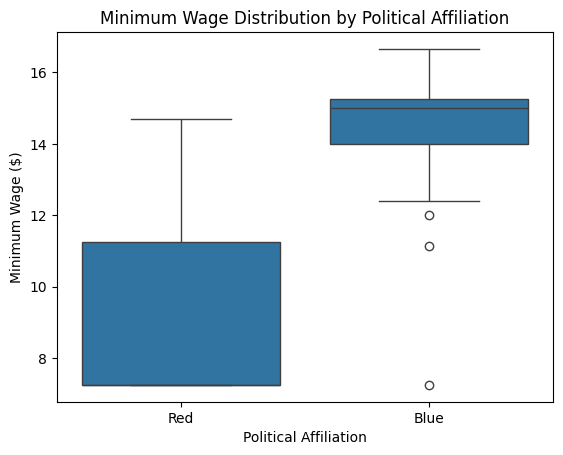

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Political_Affiliation', y='Minimum_Wage', data=df)
plt.title('Minimum Wage Distribution by Political Affiliation')
plt.xlabel('Political Affiliation')
plt.ylabel('Minimum Wage ($)')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


politics = pd.read_csv("Dataset_Final Project state_political_affiliation.csv")
wages = pd.read_csv("Dataset_Final Project US_Minimum_Wages.csv")
cost = pd.read_csv("Dataset_Final Project Cost_of_Living_by_State.csv")

data = politics.merge(wages, on='State').merge(cost, on='State')

model = smf.ols('Minimum_Wage ~ C(Political_Affiliation) + Cost_of_Living_Index', data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Minimum_Wage   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           7.69e-09
Time:                        22:10:40   Log-Likelihood:                -113.27
No. Observations:                  50   AIC:                             232.5
Df Residuals:                      47   BIC:                             238.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

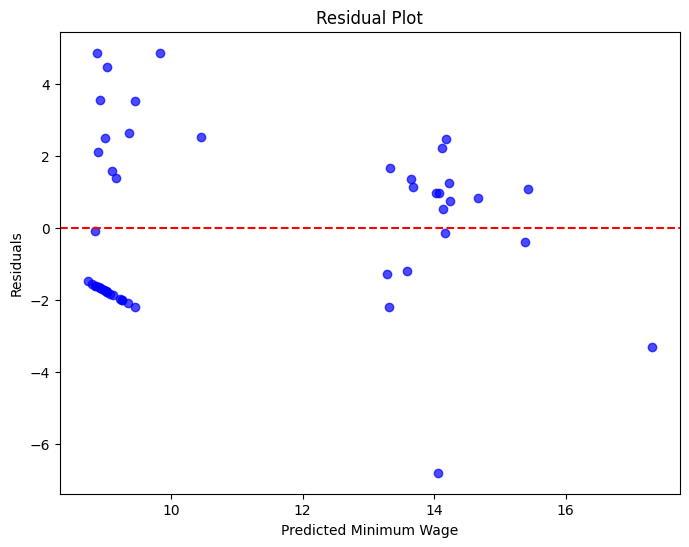

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

predicted = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8,6))
plt.scatter(predicted, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Minimum Wage')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
